# Time Series Analysis: Coffee Price Prediction Between 2000 and 2022

## Part 1.1: Exploratory Analysis

In [1450]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [1451]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

from pylab import rcParams

import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

In [1452]:
#Data source:https://www.kaggle.com/datasets/psycon/daily-coffee-price
Coffee_Price=pd.read_csv(r"C:\Users\Apple\Desktop\新建文件夹 (5)\Coffe Price\coffee.csv")
Coffee_Price['Date']=Coffee_Price['Date'].astype("datetime64")

In [1453]:
Coffee_Price.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-03,122.25,124.00,116.10,116.50,6640,USD
1,2000-01-04,116.25,120.50,115.75,116.25,5492,USD
2,2000-01-05,115.00,121.00,115.00,118.60,6165,USD
3,2000-01-06,119.00,121.40,116.50,116.85,5094,USD
4,2000-01-07,117.25,117.75,113.80,114.15,6855,USD


<AxesSubplot:xlabel='Date', ylabel='Open'>

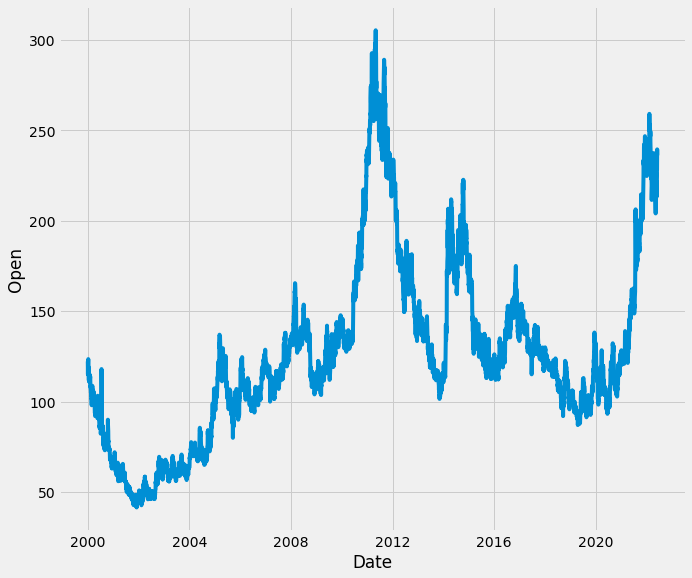

In [1454]:
sns.lineplot(x="Date",y="Open",data=Coffee_Price)

In [1455]:
print("missing data: ", Coffee_Price.isnull().sum())

missing data:  Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64


## Part 1.2 Resample Daily Data to Monthly Data

In [1456]:
Coffee_Price.set_index(Coffee_Price["Date"],inplace=True)
Coffee_Price.head()

,Date,Open,High,Low,Close,Volume,Currency
Date,,,,,,,
2000-01-03,2000-01-03,122.25,124.00,116.10,116.50,6640,USD
2000-01-04,2000-01-04,116.25,120.50,115.75,116.25,5492,USD
2000-01-05,2000-01-05,115.00,121.00,115.00,118.60,6165,USD
2000-01-06,2000-01-06,119.00,121.40,116.50,116.85,5094,USD
2000-01-07,2000-01-07,117.25,117.75,113.80,114.15,6855,USD


In [1457]:
Coffee_Price_Month=Coffee_Price["Open"].resample("MS").mean()
Coffee_Price_Month.head()

Date
2000-01-01    116.035000
2000-02-01    106.912500
2000-03-01    104.708696
2000-04-01     96.534211
2000-05-01     96.813636
Freq: MS, Name: Open, dtype: float64

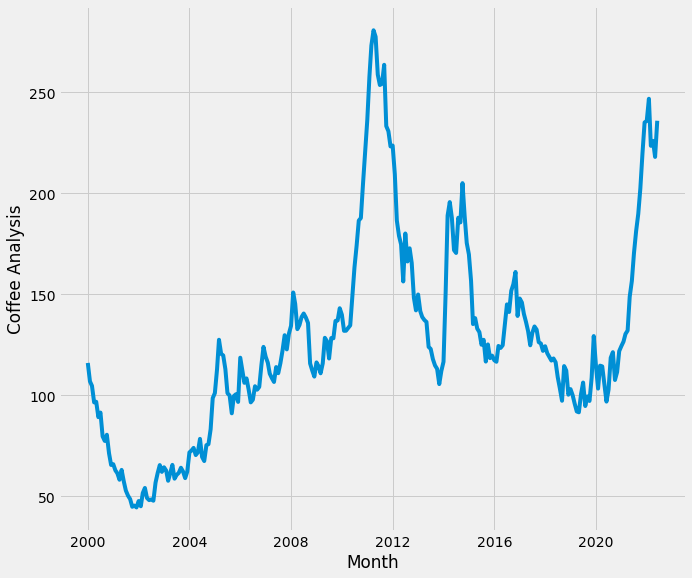

In [1458]:
plt.xlabel('Month')
plt.ylabel('Coffee Analysis')
plt.plot(Coffee_Price_Month)

In [1459]:
Coffee_Price_Month.describe()

count    270.000000
mean     125.858896
std       49.857535
min       44.532353
25%       98.841929
50%      118.886250
75%      141.955113
max      280.654762
Name: Open, dtype: float64

## Part 1.3 Curve Fitting and Rolling Mean

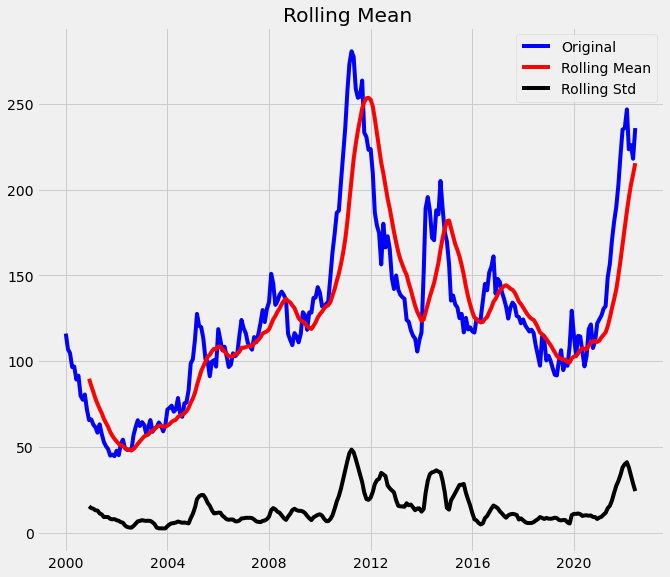

In [1460]:
rollingmean = Coffee_Price_Month.rolling(window=12).mean()
rollingstd = Coffee_Price_Month.rolling(window=12).std()
orig = plt.plot(Coffee_Price_Month, color='blue', label='Original')
mean = plt.plot(rollingmean , color='red', label='Rolling Mean')
std = plt.plot(rollingstd, color='black', label='Rolling Std')
plt.plot(figsize=(10, 6))
plt.legend(loc='best')
plt.title('Rolling Mean ')
plt.show(block=False)

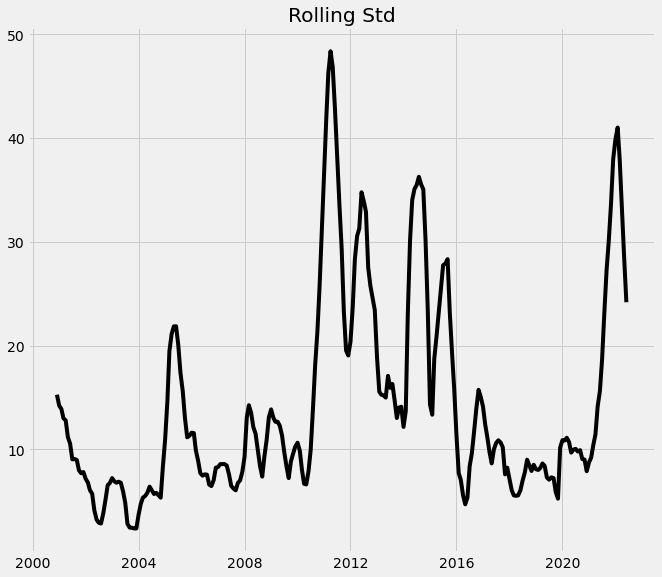

In [1461]:
std = plt.plot(rollingstd, color='black', label='Rolling Std')
plt.title('Rolling Std')
plt.show(block=False)

## Part 1.4 Decomposition of Time Series

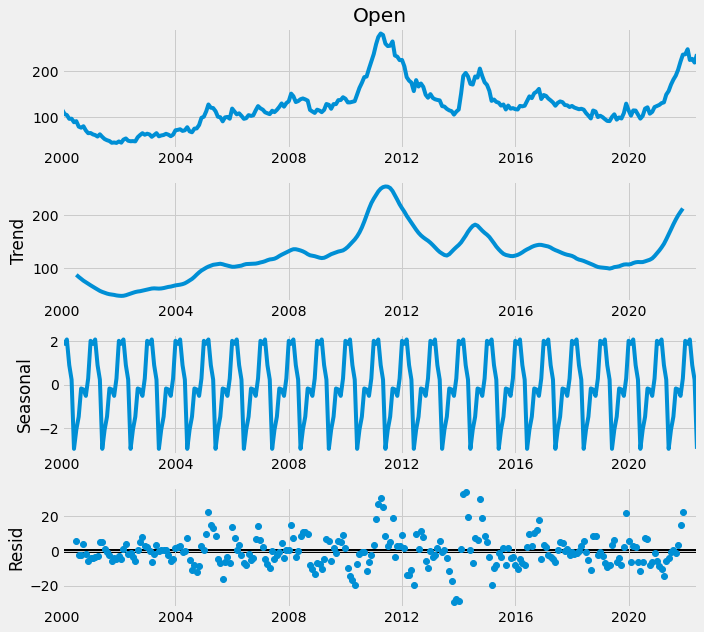

In [1462]:
#%matplotlib notebook
deco = sm.tsa.seasonal_decompose(Coffee_Price_Month, model='additive')
plt.rcParams['figure.figsize'] = (10,9)
fig=deco.plot()
plt.show()

In [1463]:
#https://blog.csdn.net/weixin_43290383/article/details/113175319
#https://blog.csdn.net/Caiqiudan/article/details/118059325?utm_source=app&app_version=5.5.0\

In [1464]:
Full_Table=pd.DataFrame({"Trend":deco.trend.fillna(deco.trend.bfill()).fillna(deco.trend.ffill()),"Seasonal":deco.seasonal,"Residual":deco.resid.fillna(deco.resid.bfill()).fillna(deco.resid.ffill())})
Full_Table.head()

,Trend,Seasonal,Residual
Date,,,
2000-01-01,87.605043,2.021627,5.953102
2000-02-01,87.605043,1.884158,5.953102
2000-03-01,87.605043,2.084445,5.953102
2000-04-01,87.605043,0.900482,5.953102
2000-05-01,87.605043,0.233143,5.953102


## Part 1.5 ADF Test and ACF/PACF For Residuals

In [1465]:
deco.resid.describe()

count    258.000000
mean      -0.192720
std        9.386531
min      -29.329348
25%       -5.689450
50%       -0.776808
75%        4.324786
max       33.653895
Name: resid, dtype: float64

In [1466]:
deco.resid.isnull().sum()

12

In [1467]:
Coffee_Residual = deco.resid
Coffee_Residual=Coffee_Residual.dropna()
#Coffee_Residual = Coffee_Residual.fillna(Coffee_Residual.bfill())
#Coffee_Residual = Coffee_Residual.fillna(Coffee_Residual.ffill())

In [1468]:
Coffee_Residual.describe()

count    258.000000
mean      -0.192720
std        9.386531
min      -29.329348
25%       -5.689450
50%       -0.776808
75%        4.324786
max       33.653895
Name: resid, dtype: float64

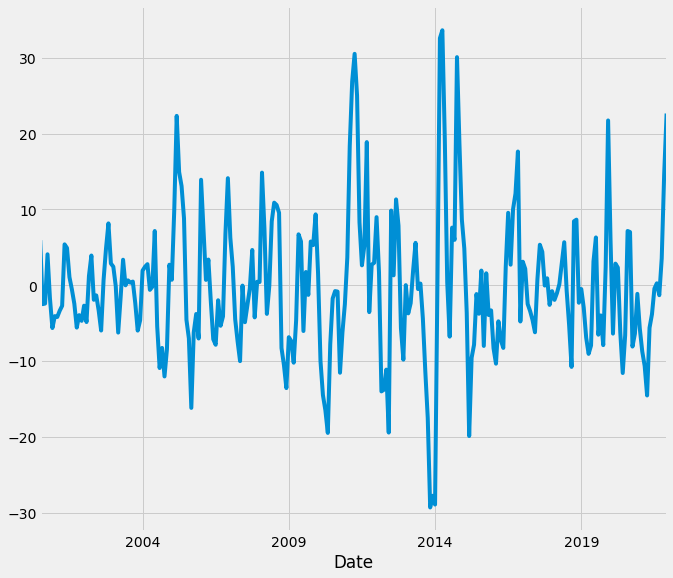

In [1469]:
fig =Coffee_Residual.plot()
plt.show()

In [1470]:
Residual_ADFresult = adfuller(Coffee_Residual)
print('ADF Statistic: %f' % Residual_ADFresult[0])
print('p-value: %f' % Residual_ADFresult[1])
print('Critical Values:')
for key, value in Residual_ADFresult[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.502455
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


P-value: 0.000869 is extremely close to 0, so that we believe Coffee_Residual is a stationary data.

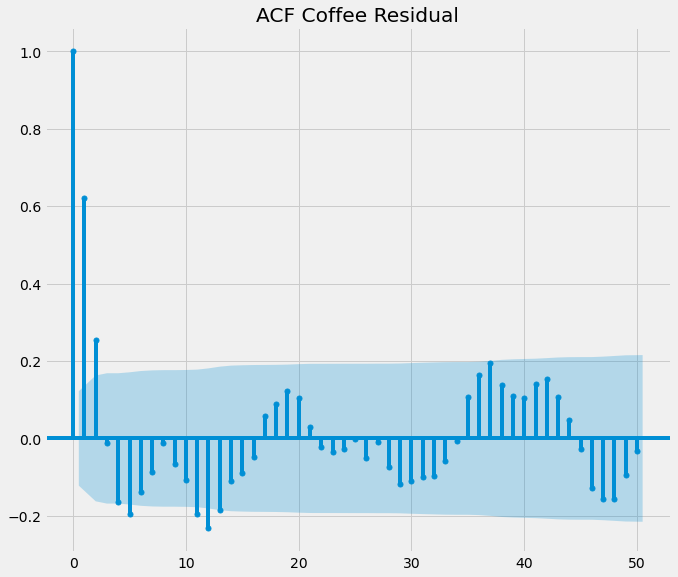

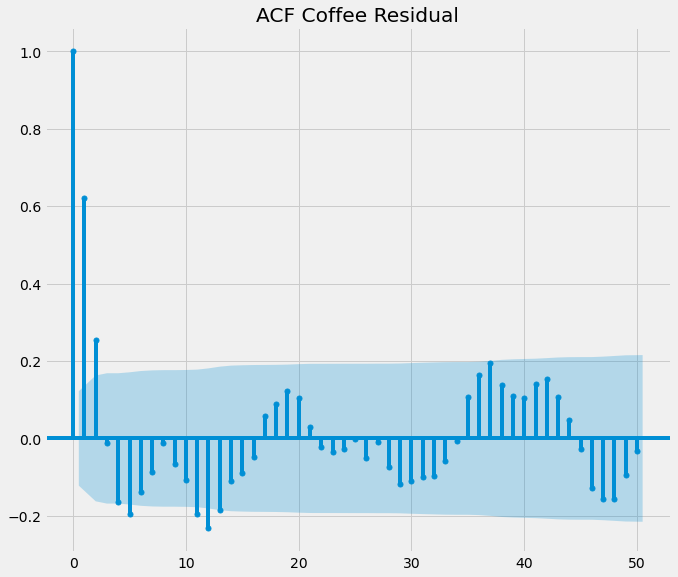

In [1471]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(Coffee_Residual,lags=50,title="ACF Coffee Residual")

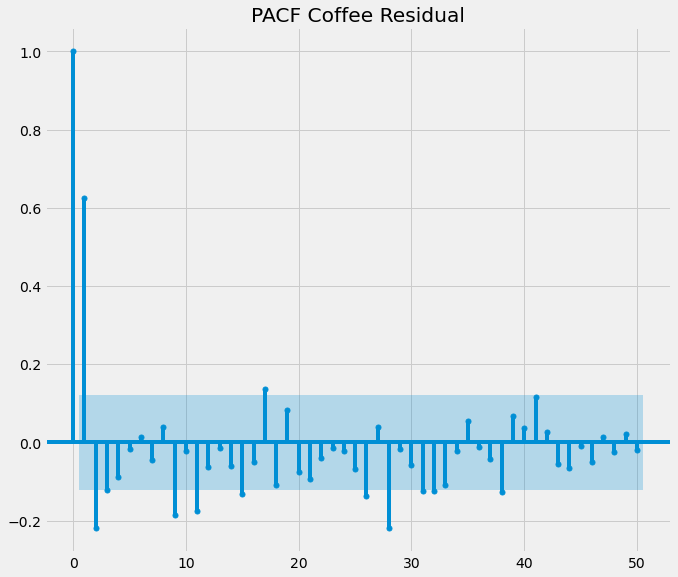

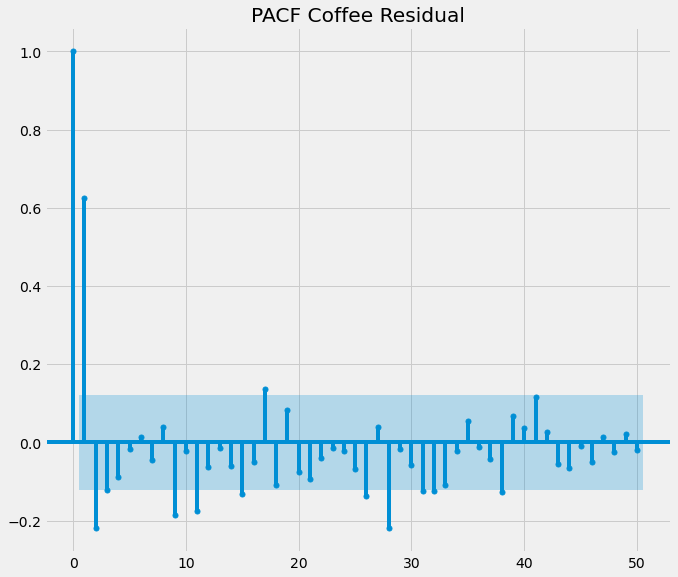

In [1472]:
plot_pacf(Coffee_Residual,lags=50,title="PACF Coffee Residual")

Judging two charts above, we could find out that both ACF and PACF of Coffee_Residual is tail off. ARMA model should be employeed and with 

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                  258
Model:               SARIMAX(4, 0, 2)   Log Likelihood                -868.900
Date:                Tue, 07 Jun 2022   AIC                           1751.799
Time:                        18:48:29   BIC                           1776.670
Sample:                    07-01-2000   HQIC                          1761.800
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0863      1.485      0.731      0.465      -1.825       3.997
ar.L2         -0.5697      1.741     -0.327      0.744      -3.982       2.843
ar.L3          0.1130      0.706      0.160      0.8

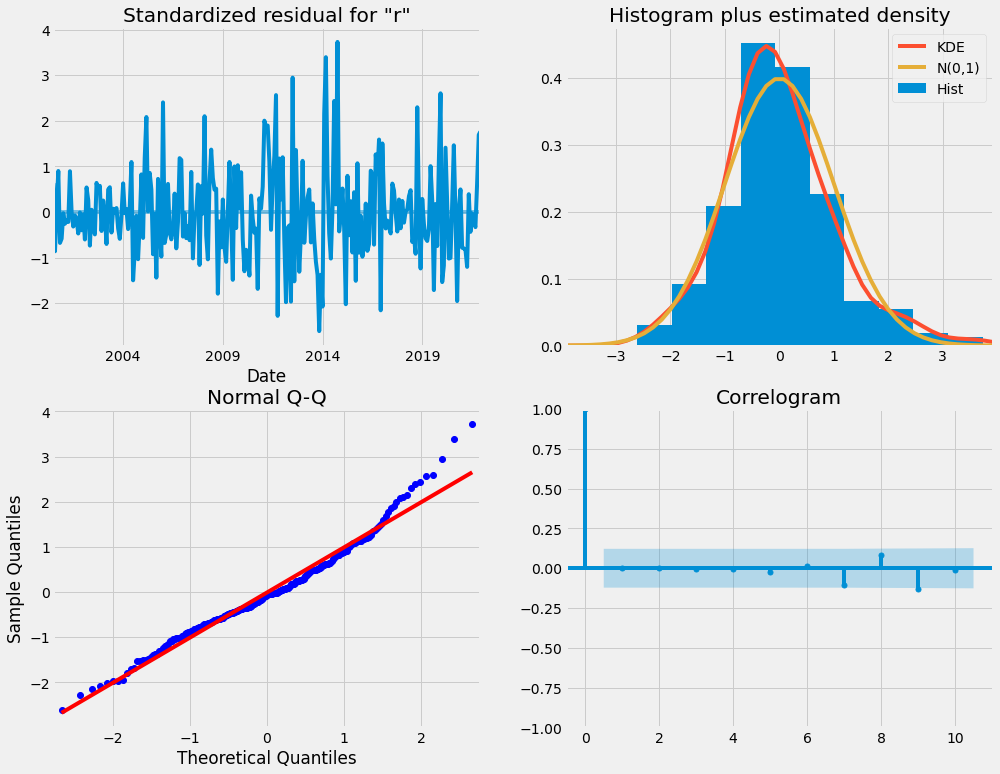

In [1473]:
#PACF=4 for AR(P)
#D=07
#ACF=2 for MA (Q)

Coffee_Residual_Model = sm.tsa.statespace.SARIMAX(Coffee_Residual,order=(4, 0, 2),)
TSresults = Coffee_Residual_Model.fit()
print(TSresults.summary())

TSresults.plot_diagnostics(figsize=(15, 12))
plt.show()

## Part 1.6 ADF Test and ACF/PACF For Coffee_Price_Month

In [1474]:
Coffee_Price_Month_diff1 = Coffee_Price_Month.diff().dropna()

In [1475]:
Residual_ADFresult = adfuller(Coffee_Price_Month_diff1)

In [1476]:
print('ADF Statistic: %f' % Residual_ADFresult[0])
print('p-value: %f' % Residual_ADFresult[1])
print('Critical Values:')
for key, value in Residual_ADFresult[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.298338
p-value: 0.000000
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.573


In [1477]:
#We could find after 1 diff, the diff1 is stationary dataset.

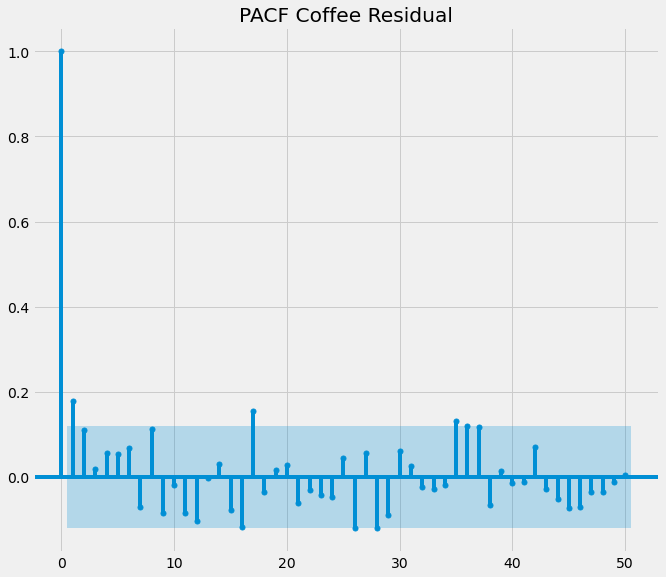

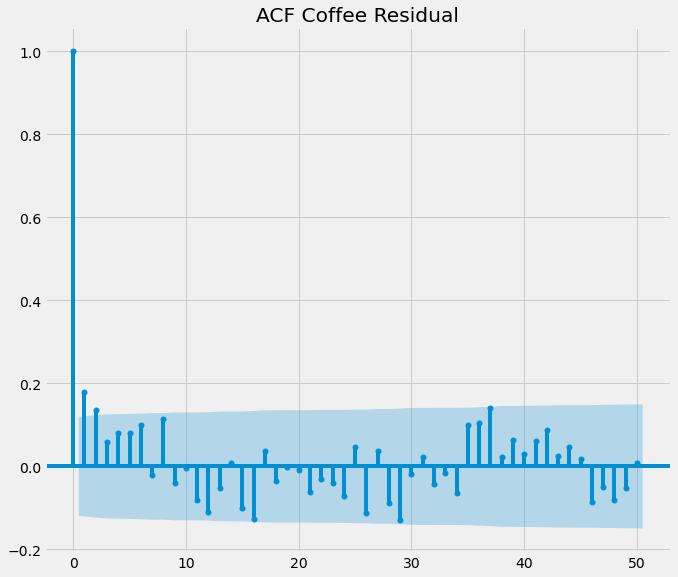

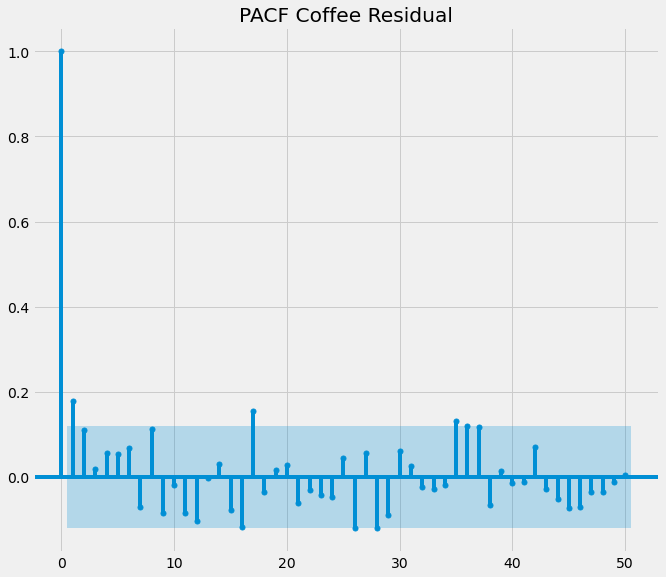

In [1478]:
plot_acf(Coffee_Price_Month_diff1,lags=50,title="ACF Coffee Residual")
plot_pacf(Coffee_Price_Month_diff1,lags=50,title="PACF Coffee Residual")

## Part 1.7 ARIMA Model for Coffee Price Month

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  270
Model:               SARIMAX(2, 1, 6)   Log Likelihood                -969.467
Date:                Tue, 07 Jun 2022   AIC                           1956.935
Time:                        18:48:33   BIC                           1989.287
Sample:                    01-01-2000   HQIC                          1969.927
                         - 06-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2796      0.215     -1.299      0.194      -0.702       0.142
ar.L2          0.4516      0.220      2.049      0.041       0.020       0.884
ma.L1          0.4604      0.223      2.063      0.0

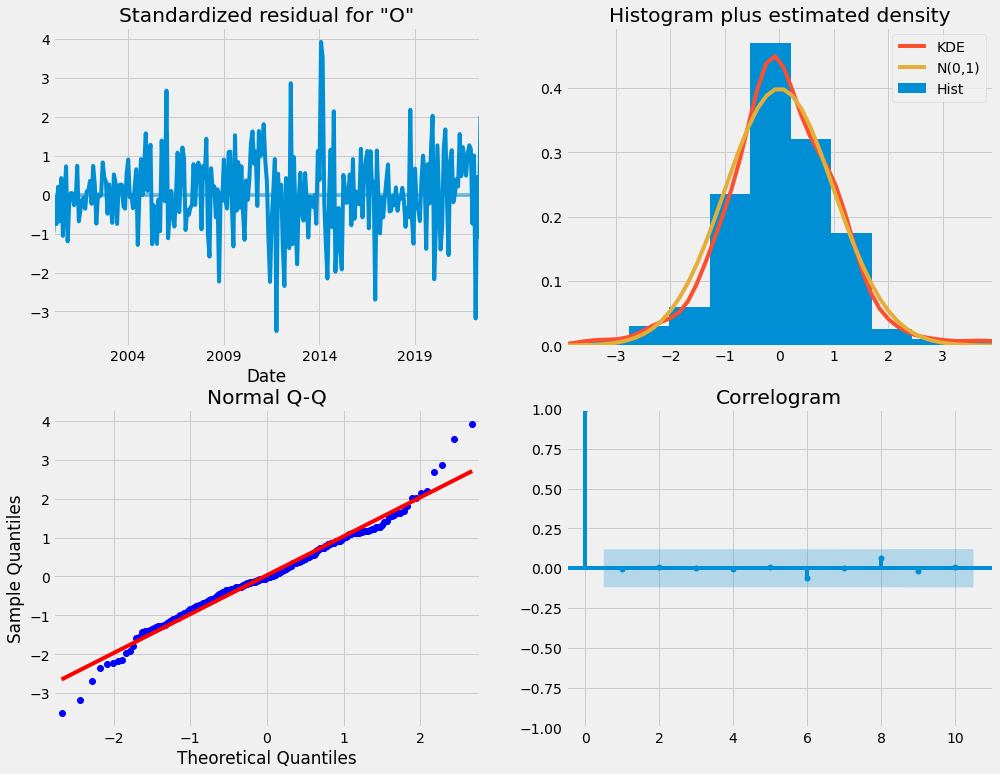

In [1479]:
#PACF=2 for AR(P)
#D=1
#ACF=6 for MA (Q)
Coffee_Price_Month_Model = sm.tsa.statespace.SARIMAX(Coffee_Price_Month,order=(2, 1, 6),)

TSresults =Coffee_Price_Month_Model.fit()

print(TSresults.summary())

TSresults.plot_diagnostics(figsize=(15, 12))
plt.show()

In [1480]:
pred = TSresults.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()
#Returns the confidence interval of the fitted parameters. 

ax = Coffee_Price_Month['2005':]
print(ax.head())

Date
2005-01-01    101.132500
2005-02-01    112.892105
2005-03-01    127.502273
2005-04-01    120.554762
2005-05-01    119.750000
Freq: MS, Name: Open, dtype: float64


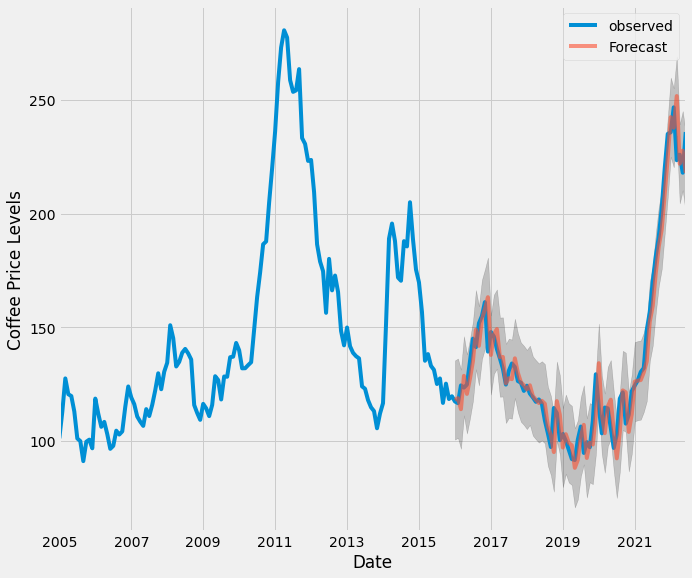

In [1481]:
pred = TSresults.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()
#Returns the confidence interval of the fitted parameters. 

ax = Coffee_Price_Month['2005':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.6)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Coffee Price Levels')
plt.legend()
plt.show()

In [1482]:
pred_ci.head()

,lower Open,upper Open
Date,,
2016-01-01,100.591820,135.414285
2016-02-01,101.425297,136.247761
2016-03-01,96.556115,131.378580
2016-04-01,111.222468,146.044932
2016-05-01,103.274016,138.096480


In [1483]:
Coffee_Price_Month_forecasted = pred.predicted_mean
Coffee_Price_Month_truth = Coffee_Price_Month['2016-01-01':]

# Compute the mean square error
mse = ((Coffee_Price_Month_forecasted - Coffee_Price_Month_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))


The Mean Squared Error of our forecasts is 82.03


In [1484]:
from sklearn.metrics import r2_score
r2_score(Coffee_Price_Month_truth, Coffee_Price_Month_forecasted)

0.9452902292737108

In [1485]:
#How to calcualte ad_r2
#https://stackoverflow.com/questions/49381661/how-do-i-calculate-the-adjusted-r-squared-score-using-scikit-learn